In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.1.0


In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
train_images.shape

(60000, 28, 28)

In [35]:
train_images[1][1]

array([  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
       255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
         0,   0], dtype=uint8)

In [36]:
train_labels.shape

(60000,)

In [39]:
train_labels[11110]

4

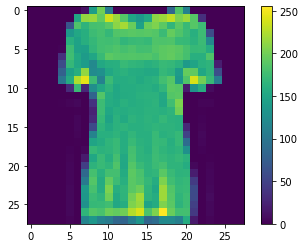

In [41]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [42]:
train_images = train_images / 255.0

test_images = test_images / 255.0


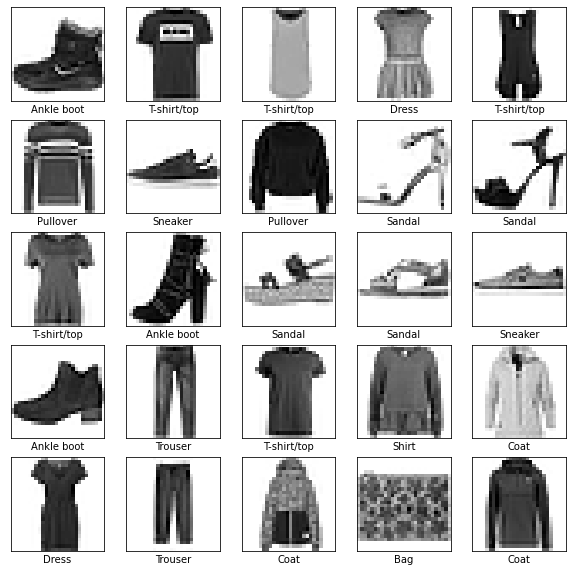

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 1.6714 - accuracy: 0.7990
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 1.6183 - accuracy: 0.8450
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 1.6067 - accuracy: 0.8561
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.6013 - accuracy: 0.8612
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.5945 - accuracy: 0.8671
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 1.5910 - accuracy: 0.8709
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 1.5862 - accuracy: 0.8760
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 1.5823 - accuracy: 0.8803
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 1.5795 - accuracy: 0.8821
Epoch 10/10
60

In [56]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.5921 - accuracy: 0.8695

Test accuracy: 0.8695


In [57]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [58]:
predictions = probability_model.predict(test_images)


In [59]:
predictions[0]


array([0.08534878, 0.08534878, 0.08534878, 0.08534878, 0.08534878,
       0.08538801, 0.08534878, 0.08539168, 0.08534878, 0.23177887],
      dtype=float32)

In [60]:
np.argmax(predictions[0])


9

In [61]:
test_labels[0]


9

In [62]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


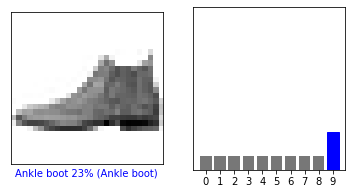

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


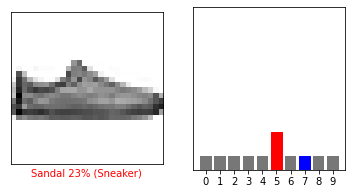

In [64]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


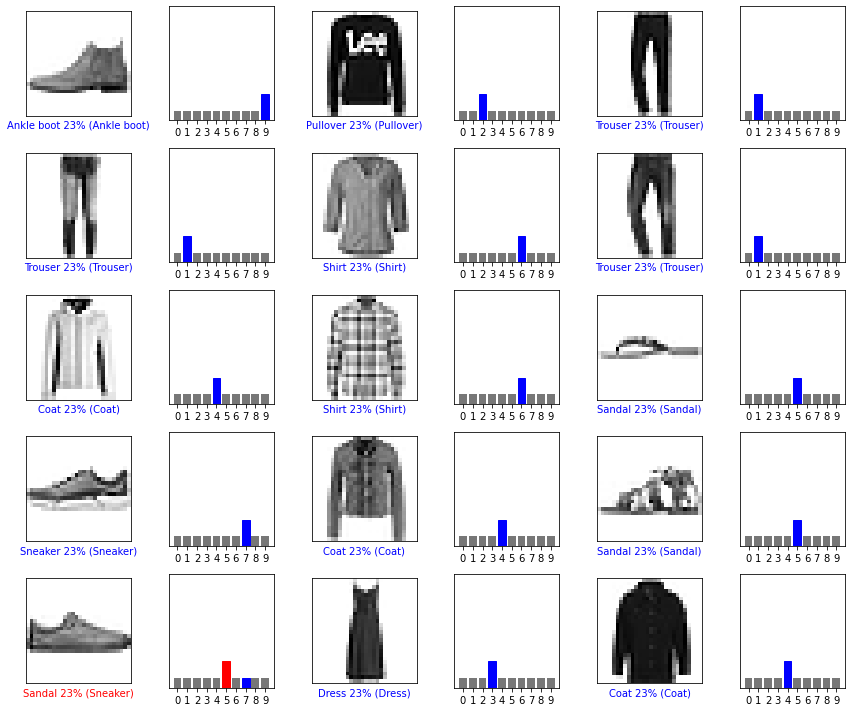

In [66]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [67]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [68]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [70]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.08533674 0.08533674 0.23196931 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]]


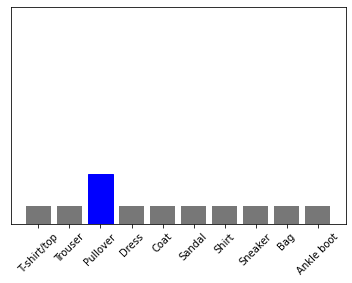

In [71]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [72]:
np.argmax(predictions_single[0])


2